# Understanding AdaBoost with a Diabetes Dataset

This notebook demonstrates the implementation of the **AdaBoost** (Adaptive Boosting) algorithm. We will first establish a baseline performance using a single Decision Tree and then show how AdaBoost improves accuracy by sequentially training weak learners. We will also visualize how the model's accuracy changes as more estimators (trees) are added to the ensemble.

## 1. Importing Necessary Libraries

First, we import all the required libraries for data manipulation, modeling, and plotting.

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for plotting and data visualization
import matplotlib.pyplot as plt

# Import train_test_split to divide the data into training and testing sets
from sklearn.model_selection import train_test_split

# Import DecisionTreeClassifier, which will serve as our baseline model and the base estimator for AdaBoost
from sklearn.tree import DecisionTreeClassifier

# Import cross_val_score to evaluate the baseline model's performance using cross-validation
from sklearn.model_selection import cross_val_score

# Import the AdaBoostClassifier, the ensemble model we will be using
from sklearn.ensemble import AdaBoostClassifier

## 2. Loading and Preparing the Data

We load the PIMA Indians Diabetes dataset and separate it into features (`X`) and the target variable (`y`).

In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('diabetes.csv')

# Display the first 5 rows of the DataFrame to inspect the data
print("Dataset Head:")
print(df.head())

# Separate the features (all columns except 'Outcome') into a DataFrame 'X'
X = df.drop('Outcome', axis='columns')

# Separate the target variable ('Outcome') into a Series 'y'
y = df.Outcome

# Display the first 5 rows of the features (X) and the target (y)
print("\nFeatures (X) Head:")
print(X.head())
print("\nTarget (y) Head:")
print(y.head())

Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Features (X) Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0

## 3. Splitting Data into Training and Testing Sets

We split our data to train the model on one subset and evaluate its performance on a separate, unseen subset.

In [3]:
# Split the data into training and test sets.
# 75% of the data will be used for training and 25% for testing.
# 'random_state=10' ensures that the split is the same every time we run the code, making it reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

## 4. Establishing a Baseline: Single Decision Tree

Before using a complex ensemble method like AdaBoost, it's good practice to see how a single, basic model performs. We use 8-fold cross-validation to get a robust estimate of the accuracy of a single Decision Tree on this dataset.

In [4]:
# Use cross-validation to evaluate a single DecisionTreeClassifier.
# 'cv=8' means the data will be split into 8 folds. The model is trained on 7 folds and tested on the 8th, repeated 8 times.
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=8)

# Print the accuracy score for each of the 8 folds
print("Cross-validation scores for a single Decision Tree:", scores)

# Calculate and print the mean accuracy across all 8 folds
print(f'\nMean percentage accuracy for individual decision trees: {scores.mean() * 100:.2f}%')

Cross-validation scores for a single Decision Tree: [0.61458333 0.71875    0.64583333 0.67708333 0.70833333 0.69791667
 0.73958333 0.71875   ]

Mean percentage accuracy for individual decision trees: 69.01%


## 5. Implementing and Evaluating AdaBoost

Now, we'll implement the AdaBoost classifier. We will iteratively train the model, adding one tree (estimator) at a time from 1 to 100. In each step, we will calculate the model's accuracy on the **test set** to observe how performance improves as the ensemble grows.

In [5]:
# Create an empty list to store the accuracy scores at each stage of boosting
test_accuracies = []

# Loop through the number of estimators from 1 to 100
for n_estimators in range(1, 101):
    # Initialize the AdaBoostClassifier with the current number of estimators.
    # By default, AdaBoost uses a Decision Tree with max_depth=1 (a "stump") as its base estimator.
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=10)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Calculate the accuracy of the model on the unseen test data
    accuracy = model.score(X_test, y_test)
    
    # Append the accuracy to our list
    test_accuracies.append(accuracy)

# The loop finishes here. 'test_accuracies' now contains 100 accuracy scores.


## 6. Visualizing AdaBoost Performance

A plot helps visualize the relationship between the number of estimators and the model's accuracy. We expect to see the accuracy increase and then stabilize as more weak learners are added.

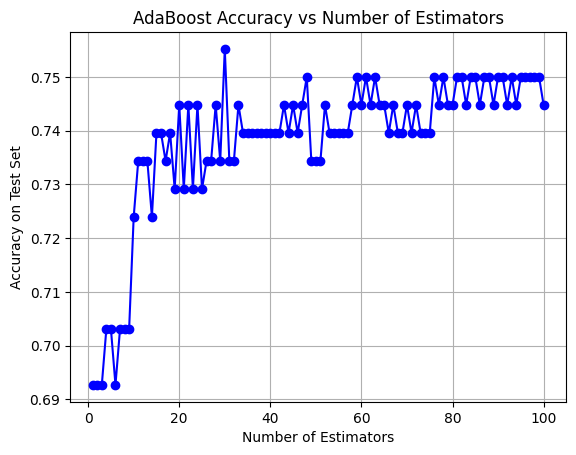

In [6]:
# Plot the number of estimators (x-axis) against the accuracy on the test set (y-axis)
plt.plot(range(1, 101), test_accuracies, marker='o', linestyle='-', color='b')

# Set the title and labels for the plot for clarity
plt.title('AdaBoost Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy on Test Set')

# Add a grid for better readability
plt.grid(True)

# Display the plot
plt.show()

## 7. Final Model Accuracy

Finally, we print the accuracy of the fully trained AdaBoost model with 100 estimators. This shows the performance improvement over the baseline single Decision Tree.

In [7]:
# Get the last accuracy score from our list, which corresponds to the model with 100 estimators
final_accuracy = test_accuracies[-1] * 100

# Print the final accuracy, formatted to two decimal places
print(f'Mean percentage accuracy for AdaBoost with 100 estimators: {final_accuracy:.2f}%')

Mean percentage accuracy for AdaBoost with 100 estimators: 74.48%
